In [1]:
from nhstravel.gp import GpArea, GpRegion

# Looking at the area around a GP surgery

In [2]:
# Edit this to try a different Gp practice. Uses substring search, if not unique picks the first one
practice_name = "lambeth"

In [3]:
%%time
area = GpRegion.load_england()
gp_df = area.find_practices(practice_name)
gp_df

/usr/local/google/home/nfortescue/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


CPU times: user 1.29 s, sys: 39.7 ms, total: 1.33 s
Wall time: 1.32 s


,Name,latitude,longitude,point
4368,LAMBETH WALK GROUP PRACTICE,51.505031,-0.085892,POINT (-0.0858923 51.5050313)
4382,THE SOUTH LAMBETH RD PRACTICE,51.476307,-0.105411,POINT (-0.1054114 51.4763073)
11716,A&E DIVERSION SCHEME (LAMBETH WALK) WIC,51.505031,-0.085892,POINT (-0.0858923 51.5050313)
12637,COMMUNITY PAEDIATRICIANS-LAMBETH,51.492640,-0.104708,POINT (-0.1047077467635113 51.4926396)
14827,LAMBETH HEALTHCARE PRACTICE,51.501301,-0.117287,POINT (-0.117287 51.5013012)


In [4]:
gp_df.index[0]

4368

In [5]:
%%time
gp_area = area.get_practice_area(gp_df.index[0])
G = gp_area.osm_graph()

CPU times: user 5.13 s, sys: 239 ms, total: 5.37 s
Wall time: 5.37 s


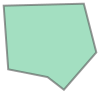

In [6]:
# Plot the region around a GP practice
gp_area.area

## Calculate walking distance times

/usr/local/google/home/nfortescue/nhs_python/nhs_time_of_travel/nhstravel/gp.py:131: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  diagram = STRtree(trimmed)


CPU times: user 844 ms, sys: 79 ms, total: 923 ms
Wall time: 832 ms


<AxesSubplot:>

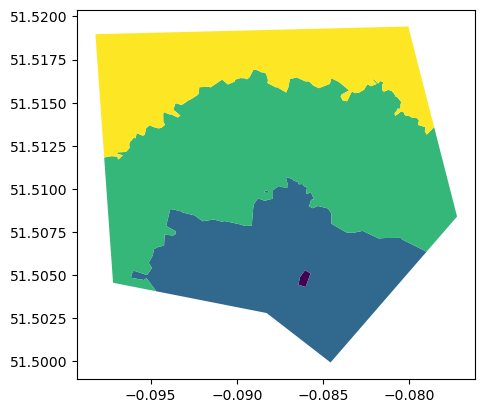

In [7]:
%%time
result = gp_area.calculate_walking_distance_polys(G, radius_minutes=10)
result['color'] = result.index
result.plot(column = 'color')